In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
metrics_df_limpio = pd.read_csv('metrics_clean.csv')

In [3]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

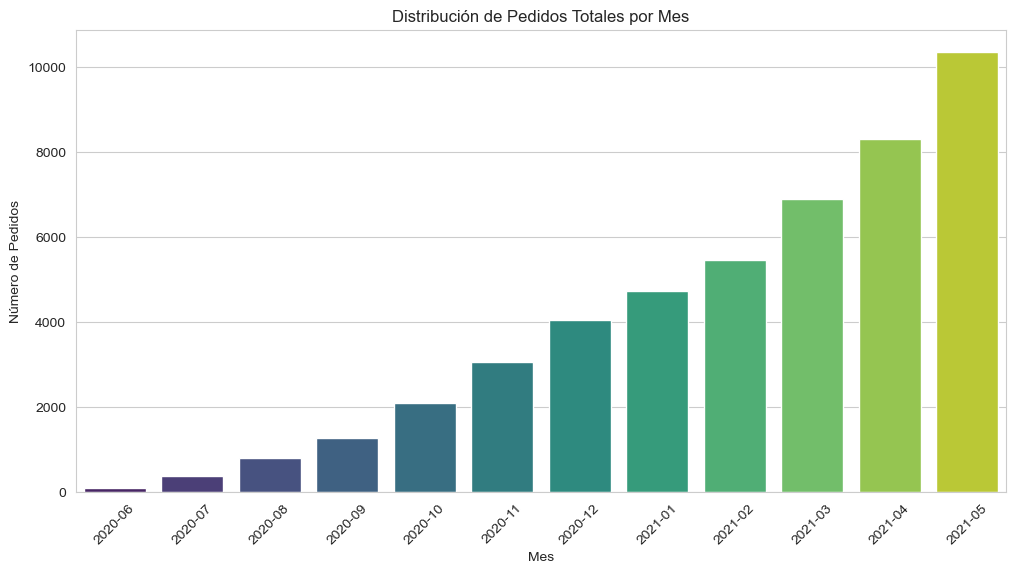

In [4]:
# Gráfico 1: Distribución de pedidos totales por mes
plt.figure(figsize=(12, 6))
sns.countplot(data=metrics_df_limpio, x='month', palette='viridis')
plt.title('Distribución de Pedidos Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()

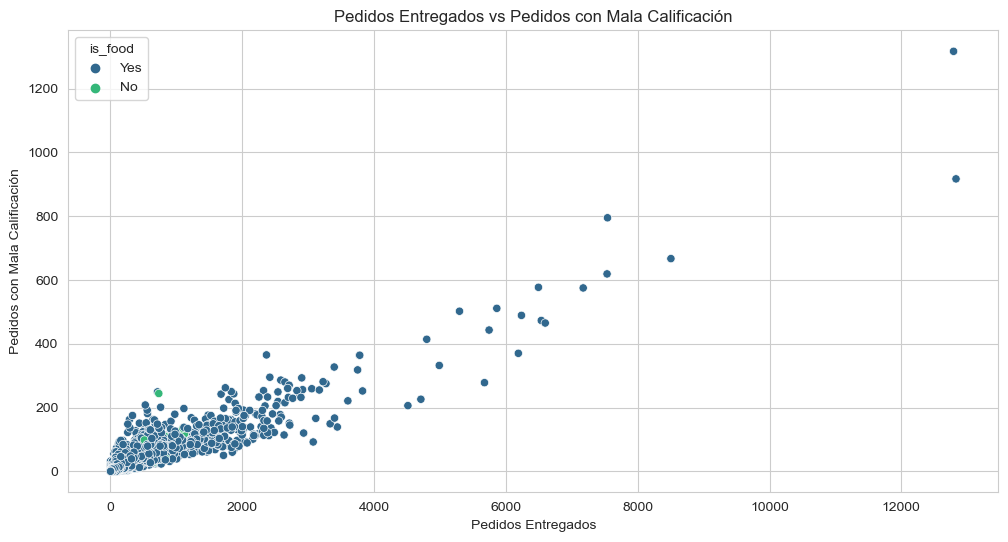

In [5]:
# Gráfico 2: Pedidos entregados vs Pedidos con mala calificación
plt.figure(figsize=(12, 6))
sns.scatterplot(data=metrics_df_limpio, x='delivered_orders', y='bad_rating_orders', hue='is_food', palette='viridis')
plt.title('Pedidos Entregados vs Pedidos con Mala Calificación')
plt.xlabel('Pedidos Entregados')
plt.ylabel('Pedidos con Mala Calificación')
plt.show()

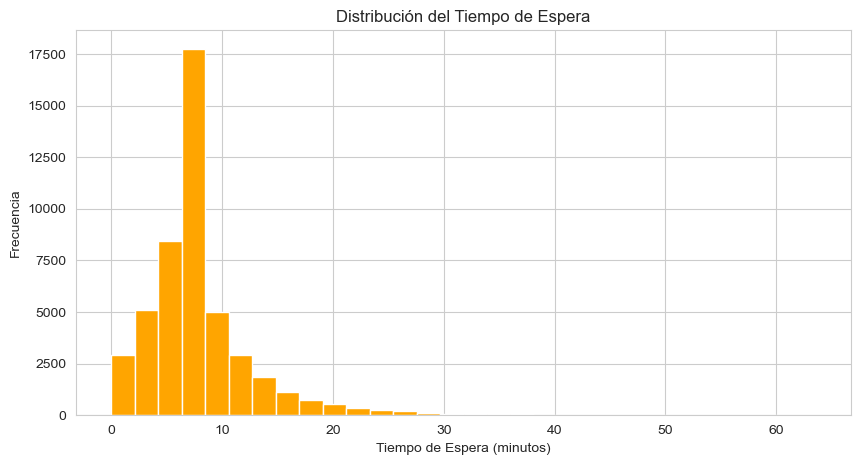

In [ ]:
# Gráfico 3: Distribución del tiempo de espera
plt.figure(figsize=(10, 5))
metrics_df_limpio['waiting_time'].hist(bins=30, color='orange')
plt.title('Distribución del Tiempo de Espera')
plt.xlabel('Tiempo de Espera (minutos)')
plt.ylabel('Frecuencia')
plt.show()

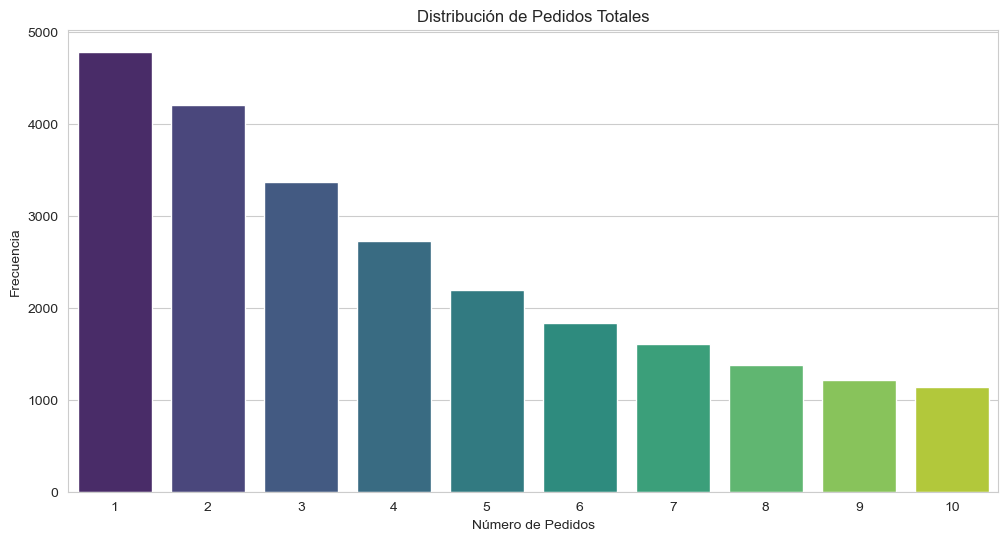

In [ ]:
# Gráfico 4: Distribución de pedidos totales
plt.figure(figsize=(12, 6))
sns.barplot(x=metrics_df_limpio['total_orders'].value_counts().index[:10], 
            y=metrics_df_limpio['total_orders'].value_counts().values[:10], palette='viridis')
plt.title('Distribución de Pedidos Totales')
plt.xlabel('Número de Pedidos')
plt.ylabel('Frecuencia')
plt.show()

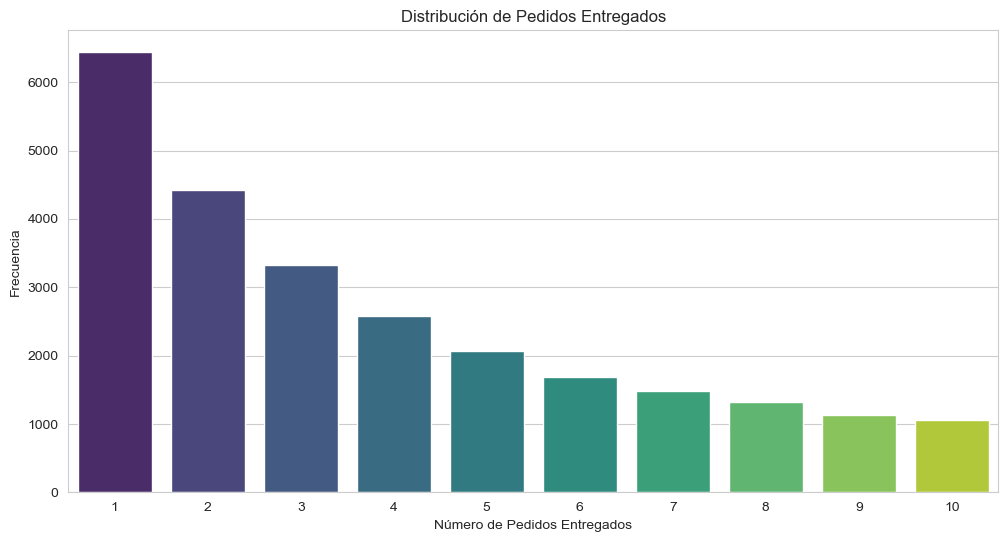

In [ ]:
# Gráfico 5: Distribución de pedidos entregados
plt.figure(figsize=(12, 6))
sns.barplot(x=metrics_df_limpio['delivered_orders'].value_counts().index[:10], 
            y=metrics_df_limpio['delivered_orders'].value_counts().values[:10], palette='viridis')
plt.title('Distribución de Pedidos Entregados')
plt.xlabel('Número de Pedidos Entregados')
plt.ylabel('Frecuencia')
plt.show()

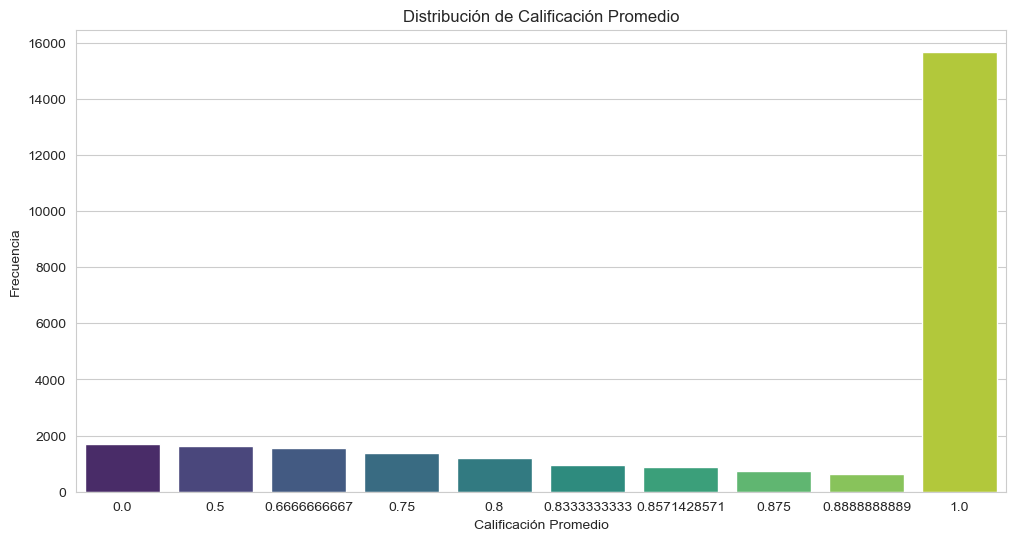

In [ ]:
# Gráfico 6: Distribución de calificación promedio
plt.figure(figsize=(12, 6))
sns.barplot(x=metrics_df_limpio['average_rating'].value_counts().index[:10], 
            y=metrics_df_limpio['average_rating'].value_counts().values[:10], palette='viridis')
plt.title('Distribución de Calificación Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()

In [27]:
# Filtrar los datos para marcas madres y Menu Splits
menu_splits = metrics_df_limpio[metrics_df_limpio['is_food'] == 'Yes']
madre_brands = metrics_df_limpio[metrics_df_limpio['is_food'] == 'No']

# Calcular el GMV total de cada grupo
gmv_menu_splits = round(menu_splits['total_gmv'].sum(), 2)
gmv_madre_brands = round(madre_brands['total_gmv'].sum(), 2)

# Calcular incremento neto de ingresos
incremento_ingresos = round(gmv_menu_splits - gmv_madre_brands, 2)

# Costes operativos
cpo_menu_splits = round(menu_splits['cpo_eur'].sum(), 2)
cpo_madre_brands = round(madre_brands['cpo_eur'].sum(), 2)

# Tasa de pedidos repetidos
recurrentes_menu_splits = menu_splits['recurrent_customers'].sum()
total_usuarios_menu_splits = menu_splits['users'].sum()
tasa_recurrentes_menu_splits = recurrentes_menu_splits / total_usuarios_menu_splits
tasa_recurrentes_menu_splits = round(tasa_recurrentes_menu_splits, 2)

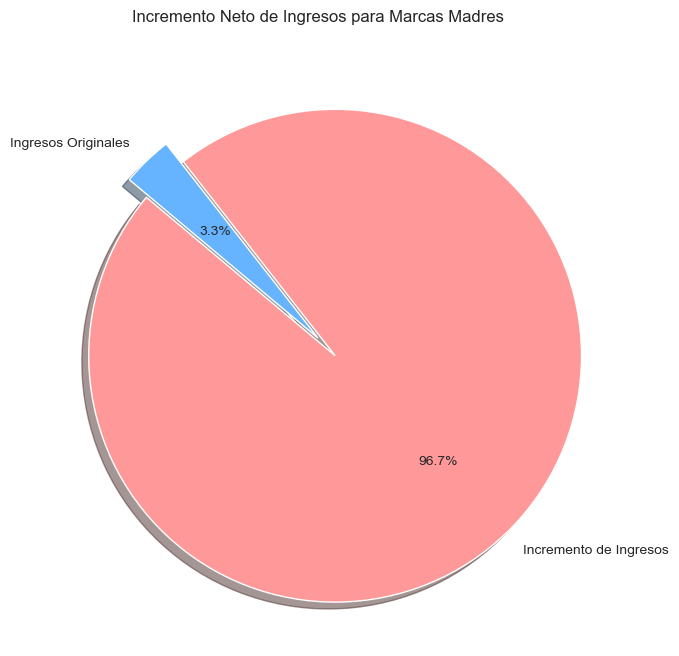

In [ ]:
# Gráfico 7: Incremento neto de ingresos
plt.figure(figsize=(8, 8))
labels = ['Incremento de Ingresos', 'Ingresos Originales']
sizes = [incremento_ingresos, gmv_madre_brands]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" el primer slice (Incremento de Ingresos)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Incremento Neto de Ingresos para Marcas Madres')
plt.show()

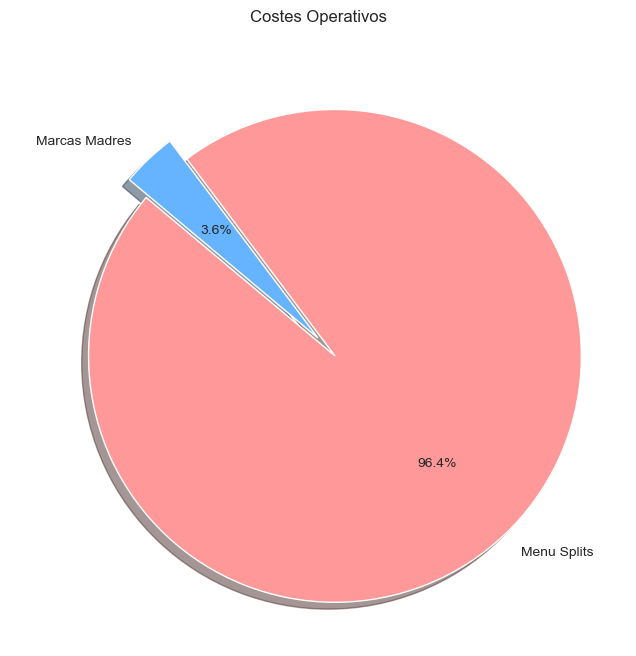

In [ ]:
# Gráfico 8: Costes operativos
plt.figure(figsize=(8, 8))
labels = ['Menu Splits', 'Marcas Madres']
sizes = [cpo_menu_splits, cpo_madre_brands]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" el primer slice (Menu Splits)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Costes Operativos')
plt.show()

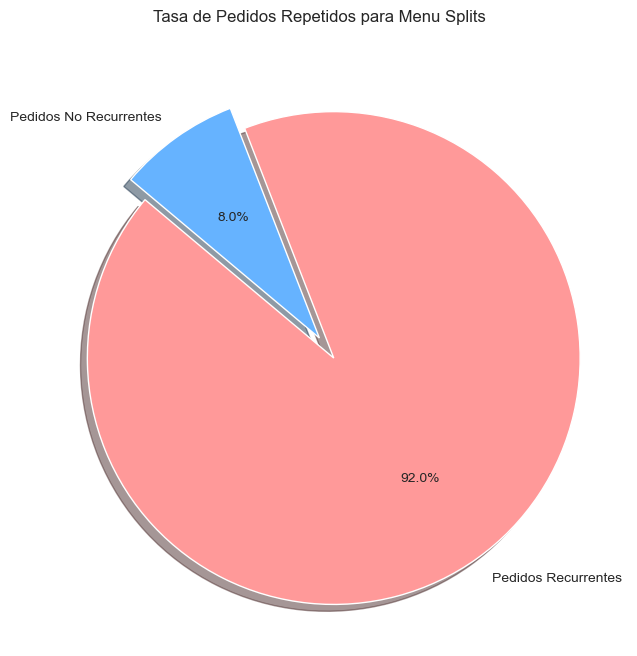

In [ ]:
# Gráfico 9: Tasa de pedidos repetidos
plt.figure(figsize=(8, 8))
labels = ['Pedidos Recurrentes', 'Pedidos No Recurrentes']
sizes = [tasa_recurrentes_menu_splits, 1 - tasa_recurrentes_menu_splits]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" el primer slice (Pedidos Recurrentes)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Tasa de Pedidos Repetidos para Menu Splits')
plt.show()

Ventas generadas por Menu Splits: 25802355.29
Ventas generadas por Marcas Madres: 856610.9


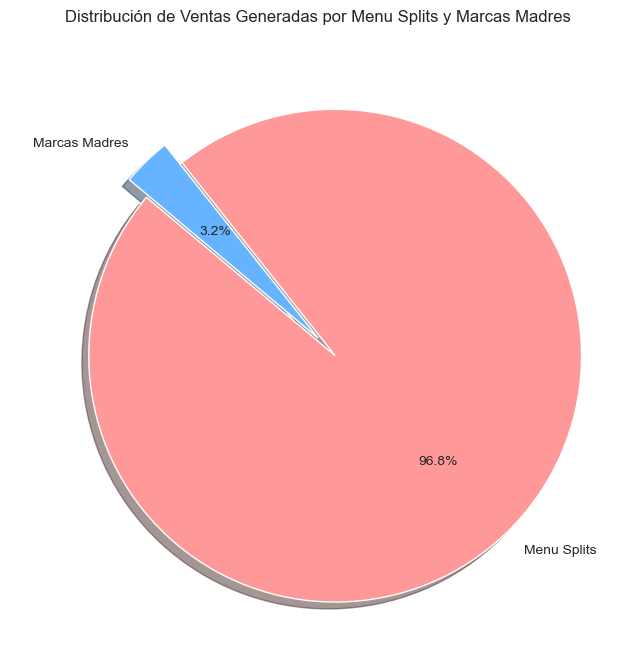

In [32]:
# Filtrar los datos para marcas madres y Menu Splits
menu_splits = metrics_df_limpio[metrics_df_limpio['is_food'] == 'Yes']
madre_brands = metrics_df_limpio[metrics_df_limpio['is_food'] == 'No']

# Calcular el GMV total de cada grupo
gmv_menu_splits = round(menu_splits['total_gmv'].sum(), 2)
gmv_madre_brands = round(madre_brands['total_gmv'].sum(), 2)

print(f"Ventas generadas por Menu Splits: {gmv_menu_splits}")
print(f"Ventas generadas por Marcas Madres: {gmv_madre_brands}")

# Datos para el gráfico circular
labels = ['Menu Splits', 'Marcas Madres']
sizes = [gmv_menu_splits, gmv_madre_brands]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" el primer slice (Menu Splits)

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribución de Ventas Generadas por Menu Splits y Marcas Madres')
plt.show()